# Danske Bank FuturePros Forecasting Homework 

Author: © 2021 [Ugnė Glinskytė](https://www.linkedin.com/in/ugn%C4%97-glinskyt%C4%97-9b3a81191/) 

I am starting with given data analysis. I print the data to understand it better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy.ma as ma

In [2]:
features = pd.read_csv("features.csv",parse_dates=[1], dayfirst=True)
stores = pd.read_csv("stores.csv")
sales = pd.read_csv("sales.csv",parse_dates=[2], dayfirst=True)

In [3]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


As it was mentioned, that there will not always be markdowns provided, I replace the NaN values with zeros.

In [4]:
features['MarkDown1'] = features['MarkDown1'].fillna(0)
features['MarkDown2'] = features['MarkDown2'].fillna(0)
features['MarkDown3'] = features['MarkDown3'].fillna(0)
features['MarkDown4'] = features['MarkDown4'].fillna(0)
features['MarkDown5'] = features['MarkDown5'].fillna(0)
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


After analyzing the data, I have noticed that even if the paper states that there are sales up to  10th December 2012, the last sales date is 26th October 2012 . This will be important for other calculations.

## Key drivers identification

This function is for merging store’s all departments sales as the features are not provided for each department separately. I make the assumption that if the features are provided for stores I can perform the merging.

In [7]:
def one_department_sales_throughout_time(dep):
    sales_in_store = sales.loc[(sales['Store'] ==dep)][['Date','Dept', 'Weekly_Sales']]
    sales_in_store = sales_in_store.groupby('Date')['Weekly_Sales'].sum()
    return sales_in_store

In [14]:
all_stores_sales = []
for i in range(1,46):
    s = sales[sales['Store'] == i]
    print(i, "store has: ",s['Dept'].nunique(), "Departments, Type: ", stores.Type[i-1],", Size:",stores.Size[i-1])
    print(i," store and correlations with features:")
    store_sales = one_department_sales_throughout_time(i)
    all_stores_sales.append(store_sales)
    store_features_temp = features.loc[(features['Store'] == i)][['Date','Temperature']].set_index('Date')
    store_features_temp = store_features_temp[(store_features_temp.index >= 
                                                           datetime.datetime(2010, 1, 10)) &
                                                      (store_features_temp.index <= datetime.datetime(2012, 10, 26))]
    store_features_fuelPrice = features.loc[(features['Store'] == i)][['Date','Fuel_Price']].set_index('Date')
    store_features_fuelPrice = store_features_fuelPrice[store_features_fuelPrice.index 
                                                                <= datetime.datetime(2012, 10, 26)]
    store_features_mrkd1 = features.loc[(features['Store'] == i)][['Date','MarkDown1']].set_index('Date')
    store_features_mrkd1 = store_features_mrkd1[(store_features_mrkd1.index >= datetime.datetime(2010, 11, 11)) &
                                                        (store_features_mrkd1.index <= datetime.datetime(2012, 10, 26))]
    store_features_mrkd2 = features.loc[(features['Store'] == i)][['Date','MarkDown2']].set_index('Date')
    store_features_mrkd2 = store_features_mrkd2[(store_features_mrkd2.index >= datetime.datetime(2010, 11, 11)) &
                                                        (store_features_mrkd2.index <= datetime.datetime(2012, 10, 26))]
    store_features_mrkd3 = features.loc[(features['Store'] == i)][['Date','MarkDown3']].set_index('Date')
    store_features_mrkd3 = store_features_mrkd3[(store_features_mrkd3.index >= datetime.datetime(2010, 11, 11)) &
                                                        (store_features_mrkd3.index <= datetime.datetime(2012, 10, 26))]
    store_features_mrkd4 = features.loc[(features['Store'] == i)][['Date','MarkDown4']].set_index('Date')
    store_features_mrkd4 = store_features_mrkd4[(store_features_mrkd4.index >= datetime.datetime(2010, 11, 11)) &
                                                        (store_features_mrkd4.index <= datetime.datetime(2012, 10, 26))]
    store_features_mrkd5 = features.loc[(features['Store'] == i)][['Date','MarkDown5']].set_index('Date')
    store_features_mrkd5 = store_features_mrkd5[(store_features_mrkd5.index >= datetime.datetime(2010, 11, 11)) &
                                                        (store_features_mrkd5.index <= datetime.datetime(2012, 10, 26))]
    store_features_cpi = features.loc[(features['Store'] == i)][['Date','CPI']].set_index('Date')
    store_features_cpi = store_features_cpi[store_features_cpi.index <= datetime.datetime(2012, 10, 26)]
    
    store_features_unempl = features.loc[(features['Store'] == i)][['Date','Unemployment']].set_index('Date')
    store_features_unempl = store_features_unempl[store_features_unempl.index 
                                                          <= datetime.datetime(2012, 10, 26)]
    store_features_isHol = features.loc[(features['Store'] == i)][['Date','IsHoliday']].set_index('Date')
    store_features_isHol = store_features_isHol[store_features_isHol.index 
                                                        <= datetime.datetime(2012, 10, 26)]
    print("Correlation with Temperature:")
    correlation = np.corrcoef(store_features_temp.Temperature.values,
                              store_sales)
    print(correlation)
    
    print("Correlation with Fuel_Price:")
    correlation = np.corrcoef(store_features_fuelPrice.Fuel_Price.values,
                              store_sales)
    print(correlation)
    print("Correlation with CPI:")
    correlation = np.corrcoef(store_features_cpi.CPI.values,
                              store_sales)
    print(correlation)
    print("Correlation with Unemployment:")
    correlation = np.corrcoef(store_features_unempl.Unemployment.values,
                              store_sales)
    print(correlation)
    print("Correlation with IsHoliday:")
    correlation = np.corrcoef(store_features_isHol.IsHoliday.values,
                              store_sales)
    print(correlation)
    #Changing the datetime of sales due to the fact that markdowns are available only after the 2010-11-11
    store_sales =store_sales[(store_sales.index >= datetime.datetime(2010, 11, 11)) &
                                                      (store_sales.index <= datetime.datetime(2012, 10, 26))]
    print("Correlation with MarkDown1:")
    correlation = np.corrcoef(store_features_mrkd1.MarkDown1.values,
                              store_sales)
    print(correlation)
    print("Correlation with MarkDown2:")
    correlation = np.corrcoef(store_features_mrkd2.MarkDown2.values,
                              store_sales)
    print(correlation)
    print("Correlation with MarkDown3:")
    correlation = np.corrcoef(store_features_mrkd3.MarkDown3.values,
                              store_sales)
    print(correlation)
    print("Correlation with MarkDown4:")
    correlation = np.corrcoef(store_features_mrkd4.MarkDown4.values,
                              store_sales)
    print(correlation)
    print("Correlation with MarkDown5:")
    correlation = np.corrcoef(store_features_mrkd5.MarkDown5.values,
                              store_sales)
    print(correlation)
    print()
    print()

1 store has:  77 Departments, Type:  A , Size: 151315
1  store and correlations with features:
Correlation with Temperature:
[[ 1.         -0.22270056]
 [-0.22270056  1.        ]]
Correlation with Fuel_Price:
[[1.         0.12459158]
 [0.12459158 1.        ]]
Correlation with CPI:
[[1.         0.22540766]
 [0.22540766 1.        ]]
Correlation with Unemployment:
[[ 1.         -0.09795539]
 [-0.09795539  1.        ]]
Correlation with IsHoliday:
[[1.         0.19490521]
 [0.19490521 1.        ]]
Correlation with MarkDown1:
[[1.         0.17712018]
 [0.17712018 1.        ]]
Correlation with MarkDown2:
[[ 1.         -0.02171266]
 [-0.02171266  1.        ]]
Correlation with MarkDown3:
[[1.        0.2718843]
 [0.2718843 1.       ]]
Correlation with MarkDown4:
[[1.         0.13584866]
 [0.13584866 1.        ]]
Correlation with MarkDown5:
[[1.        0.1313315]
 [0.1313315 1.       ]]


2 store has:  78 Departments, Type:  A , Size: 202307
2  store and correlations with features:
Correlation wi

Correlation with Temperature:
[[ 1.         -0.13774558]
 [-0.13774558  1.        ]]
Correlation with Fuel_Price:
[[1.         0.07649993]
 [0.07649993 1.        ]]
Correlation with CPI:
[[1.         0.16397584]
 [0.16397584 1.        ]]
Correlation with Unemployment:
[[ 1.         -0.17163287]
 [-0.17163287  1.        ]]
Correlation with IsHoliday:
[[1.         0.11340512]
 [0.11340512 1.        ]]
Correlation with MarkDown1:
[[1.         0.00122441]
 [0.00122441 1.        ]]
Correlation with MarkDown2:
[[ 1.        -0.0505902]
 [-0.0505902  1.       ]]
Correlation with MarkDown3:
[[1.         0.28353392]
 [0.28353392 1.        ]]
Correlation with MarkDown4:
[[ 1.        -0.0151414]
 [-0.0151414  1.       ]]
Correlation with MarkDown5:
[[1.         0.10197643]
 [0.10197643 1.        ]]


14 store has:  77 Departments, Type:  A , Size: 200898
14  store and correlations with features:
Correlation with Temperature:
[[ 1.         -0.19985149]
 [-0.19985149  1.        ]]
Correlation with F

[[1.         0.08026648]
 [0.08026648 1.        ]]
Correlation with MarkDown1:
[[ 1.         -0.06560878]
 [-0.06560878  1.        ]]
Correlation with MarkDown2:
[[ 1.         -0.09688732]
 [-0.09688732  1.        ]]
Correlation with MarkDown3:
[[1.         0.32989942]
 [0.32989942 1.        ]]
Correlation with MarkDown4:
[[ 1.         -0.08148054]
 [-0.08148054  1.        ]]
Correlation with MarkDown5:
[[1.         0.11862283]
 [0.11862283 1.        ]]


26 store has:  76 Departments, Type:  A , Size: 152513
26  store and correlations with features:
Correlation with Temperature:
[[1.         0.21172208]
 [0.21172208 1.        ]]
Correlation with Fuel_Price:
[[1.         0.02347527]
 [0.02347527 1.        ]]
Correlation with CPI:
[[1.         0.13197951]
 [0.13197951 1.        ]]
Correlation with Unemployment:
[[ 1.        -0.0668991]
 [-0.0668991  1.       ]]
Correlation with IsHoliday:
[[1.         0.17226771]
 [0.17226771 1.        ]]
Correlation with MarkDown1:
[[1.         0.00959

Correlation with Temperature:
[[1.         0.03299319]
 [0.03299319 1.        ]]
Correlation with Fuel_Price:
[[1.         0.69718405]
 [0.69718405 1.        ]]
Correlation with CPI:
[[1.         0.81283682]
 [0.81283682 1.        ]]
Correlation with Unemployment:
[[ 1.         -0.78529027]
 [-0.78529027  1.        ]]
Correlation with IsHoliday:
[[ 1.         -0.02716267]
 [-0.02716267  1.        ]]
Correlation with MarkDown1:
[[1.         0.43790427]
 [0.43790427 1.        ]]
Correlation with MarkDown2:
[[1.         0.10497685]
 [0.10497685 1.        ]]
Correlation with MarkDown3:
[[1.         0.44446579]
 [0.44446579 1.        ]]
Correlation with MarkDown4:
[[1.         0.17755876]
 [0.17755876 1.        ]]
Correlation with MarkDown5:
[[1.         0.64886104]
 [0.64886104 1.        ]]


39 store has:  75 Departments, Type:  A , Size: 184109
39  store and correlations with features:
Correlation with Temperature:
[[1.        0.0647376]
 [0.0647376 1.       ]]
Correlation with Fuel_Pric

### Type A stores

1 store with 77 departments analysis.
Type: A, Size: 151315.
Highest correlations: Temperature(-0.22), CPI(0.22), IsHolidays(0.19), MarkDown1(0.18) and MarkDown3(0.27). 

2 store with 78 departments analysis. Type: A, Size: 202307. Highest correlations: Temperature(-0.30), Fuel_Price(-0.20), IsHoliday(0.18) and MarkDown3(0.26).

4 store with 78 departments analysis. Type: A, Size: 205863. Highest correlations: Temperature(-0.22), Fuel_Price(0.21), CPI(0.35), Unemployment(-0.34), MarkDown3(0.32) and MarkDown5(0.20).

6 store with 77 departments analysis. Type: A, Size: 202505. Highest correlations: MarkDown3(0.30).

8 store with 76 departments analysis. Type: A, Size: 155078. Highest correlations: Temperature(-0.31), IsHoliday(0.17), MarkDown3(0.28).

11 store with 78 departments analysis. Type: A, Size: 207499. Highest correlations: Temperature(-0.28) and MarkDown3(0.27).

13 store with 79 departments analysis. Type: A, Size: 219622. Highest correlations: CPI(0.16), Unemployment(-0.17) and MarkDown3(0.28).

14 store with 77 departments analysis. Type: A, Size: 200898. Highest correlations: Temperature(-0.20), Fuel_Price(-0.35), CPI(-0.42), Unemployment(0.21), MarkDown1(-0.19), MarkDown3(0.21).

19 store with 79 departments analysis. Type: A, Size: 203819. Highest correlations: Fuel_Price(-0.29), CPI(-0.15), IsHoliday(0.19), MarkDown3(0.26).

20 store with 78 departments analysis. Type: A, Size: 203742. Highest correlations: Temperature(-0.26) and MarkDown3(0.27).

24 store with 77 departments analysis. Type: A, Size: 203819.Highest correlations: IsHoliday(0.19), MarkDown3(0.23).

26 store with 76 departments analysis. Type: A, Size: 152513. Highest correlations: Temperature(0.21), IsHoliday(0.17) and MarkDown3(0.23).

27 store with 78 departments analysis. Type: A, Size: 204184. Highest correlations: Fuel_Price(-0.23), CPI(-0.21), MarkDown1(-0.18) and MarkDown3(0.29).

28 store with 77 departments analysis. Type: A, Size: 206302. Highest correlations: Temperature(-0.38), isHoliday(0.23) and MarkDown3(0.32).

31 store with 76 departments analysis. Type: A, Size: 203750. Highest correlations: Temperature(-0.26), IsHoliday(0.23), MarkDown3(0.39).

32 store with 77 departments analysis. Type: A, Size: 203007. Highest correlations: CPI(0.20) and MarkDown3(0.33).

33 store with 63 departments analysis. Type: A, Size: 39690. Highest correlations: MarkDown1(0.36) and MarkDown5(0.18).

34 store with 78 departments analysis. Type: A, Size: 158114. Highest correlations: Temperature(-0.28), IsHoliday(0.20) and MarkDown3(0.32).

36 store with 63 departments analysis. Type: A, Size: 39910. Highest correlations: Fuel_Price(-0.73), CPI(-0.91), Unemployment(0.83), MarkDown1(-0.43), MarkDown3(-0.20) and MarkDown5(-0.54).

39 store with 75 departments analysis. Type: A, Size: 184109. Highest correlations: Fuel_Price(0.27), CPI(0.43), Unemployment(-0.38) and MarkDown3(0.37).

40 store with 77 departments analysis. Type: A, Size: 155083. Highest correlations: MarkDown3(0.21).

41 store with 77 departments analysis. Type: A, Size: 196321. Highest correlations: Fuel_Price(0.31), CPI(0.39), Unemployment(-0.35), MarkDown1(0.31).

#### Conclusion

As correlations present, there are the most correlation with Temperature, IsHoliday and MarkDown3 features. The sales increases the most when temperature drops, it is holiday season and markdown1 goes up. There are also correlations with fuel price, CPI, unemployment, markdown1 and markdown3. However, it is hard to determine whether  correlation is positive or negative.

### Type B stores

3 store with 72 departments analysis. Type: B, Size: 37392. Highest correlations: Temperature(-0.38), CPI(0.31), Unemployment(-0.23), IsHoliday(0.21), MarkDown1(0.20), MarkDown3(0.31) and MarkDown5(0.27).

5 store with 72 departments analysis. Type: B, Size: 34875. Highest correlations: Temperature(-0.18), Fuel_Price(0.17) CPI(0.31), Unemployment(-0.21), IsHoliday(0.30), MarkDown3(0.46) and MarkDown5(0.20).

7 store with 76 departments analysis. Type: B, Size: 70713. Highest correlations: CPI(0.29), Unemployment(-0.17), IsHoliday(0.25), MarkDown2(0.18) and MarkDown3(0.31).

9 store with 73 departments analysis. Type: B, Size: 125833. Highest correlations: Temperature(-0.21), Fuel_Price(0.21), CPI(0.29), Unemployment(-0.19), IsHoliday(0.18), MarkDown3(0.35) and MarkDown5(0.23).

10 store with 77 departments analysis. Type: B, Size: 126512. Highest correlations: Temperature(-0.43), Fuel_Price(-0.19), IsHoliday(0.20) and MarkDown3(0.31).

12 store with 75 departments analysis. Type: B, Size: 112238. Highest correlations: Temperature(-0.37), IsHoliday(0.26), MarkDown3(0.37) and MarkDown5(0.22).

15 store with 79 departments analysis. Type: B, Size: 123737. Highest correlations: Fuel_Price(-0.19), CPI(-0.17), IsHoliday(0.19), MarkDown1(-0.14) and MarkDown3(0.33).

16 store with 76 departments analysis. Type: B, Size: 57197. Highest correlations: Temperature(0.18) and MarkDown3(0.21).

17 store with 76 departments analysis. Type: B, Size: 93188. Highest correlations: Fuel_Price(0.31), CPI(0.35), Unemployment(-0.26), IsHoliday(0.21), MarkDown3(0.27) and MarkDown5(0.19).

18 store with 78 departments analysis. Type: B, Size: 120653. Highest correlations: Fuel_Price(-0.28), CPI(-0.19) and MarkDown3(0.29).

21 store with 77 departments analysis. Type: B, Size: 140167. Highest correlations: Temperature(-0.18), CPI(-0.16), Unemployment(0.22), MarkDown1(-0.16), MarkDown3(0.31).

22 store with 76 departments analysis. Type: B, Size: 119557. Highest correlations: MarkDown3(0.28).

23 store with 77 departments analysis. Type: B, Size: 114533. Highest correlations: MarkDown2(-0.18) and MarkDown3(0.24).

25 store with 77 departments analysis. Type: B, Size: 128107. Highest correlations: MarkDown3(0.33).

29 store with 77 departments analysis. Type: B, Size: 93638. Highest correlations: IsHoliday(0.19), MarkDown3(0.33).

35 store with 74 departments analysis. Type: B, Size: 103681. Highest correlations: Fuel_Price(-0.50), CPI(-0.42), Unemployment(0.48), IsHoliday(0.20) and MarkDown3(0.46).

45 store with 74 departments analysis. Type: B, Size: 118221. Highest correlations: Temperature(-0.20), MarkDown3(0.29).

#### Conclusion
As correlations present, there are the most correlation with Temperature, Unemployment, IsHoliday, MarkDown3, MarkDown5 features. The sales increases the most when temperature drops, unemployment decreases, it is holiday season, markdown3 and markdown5 goes up. There are also correlations with fuel price, CPI, markdown1, markdown2. However, it is hard to determine whether  correlation is positive or negative.

## Type C stores

30 store with 64 departments analysis. Type: C, Size: 42988. Highest correlations: Temperature(-0.33), Fuel_Price(-0.43), CPI(-0.30) and Unemployment(0.20).

37 store with 62 departments analysis. Type: C, Size: 39910. Highest correlations: Temperature(-0.30), Fuel_Price(0.21), CPI(0.24), Unemployment(-0.22).

38 store with 63 departments analysis. Type: C, Size: 39690. Highest correlations: Fuel_Price(0.70), CPI(0.81), Unemployment(-0.78), MarkDown1(0.44), MarkDown3(0.44), MarkDown4(0.18) and MarkDown5(0.65).

42 store with 62 departments analysis. Type: C, Size: 39690. Highest correlations: Fuel_Price(0.32), CPI(0.36), Unemployment(-0.36), MarkDown1(0.20), MarkDown2(0.18), MarkDown3(0.25), MarkDown5(0.28).

43 store with 61 departments analysis. Type: C, Size: 41062. Highest correlations: Fuel_Price(-0.34), CPI(-0.29), Unemployment(-0.20), MarkDown3(0.24) and MarkDown5(0.17).

44 store with 62 departments analysis. Type: C, Size: 39910. Highest correlations: Temperature(0.27), Fuel_Price(0.61), CPI(0.74), Unemployment(-0.78), MarkDown1(0.30), MarkDown3(0.26), MarkDown4(0.19), MarkDown5(0.58).

#### Conclusion
As correlations present, there are the most correlation with Unemployment, MarkDown1, MarkDown3 and MarkDown5 features. The sales increases the most when unemployment decreases, markdown1, markdown3 and markdown5 goes up. There are also correlations with fuel prices, CPI, markdown2 and markdown4. However, it is hard to determine whether  correlation is positive or negative.

### Conslusion

Key driving features would be:
1.   decreasing temperature, 
2.   decreasing unemployment rate,
3.   holiday season, 
4.   increasing markdown3,
5.   increasing markdown5.

## Making suggestions for the CFO

Before providing suggestions I printed out the graph of the sales to see the overall view of sales in stores. I also separated them by type and marked their size. The blue lines mark holiday weeks. As the holidays are marked at the same dates for all stores, I only take the store’s 1 IsHoliday feature. This conclusion was made after analyzing the data.

### Overall sales in type A stores

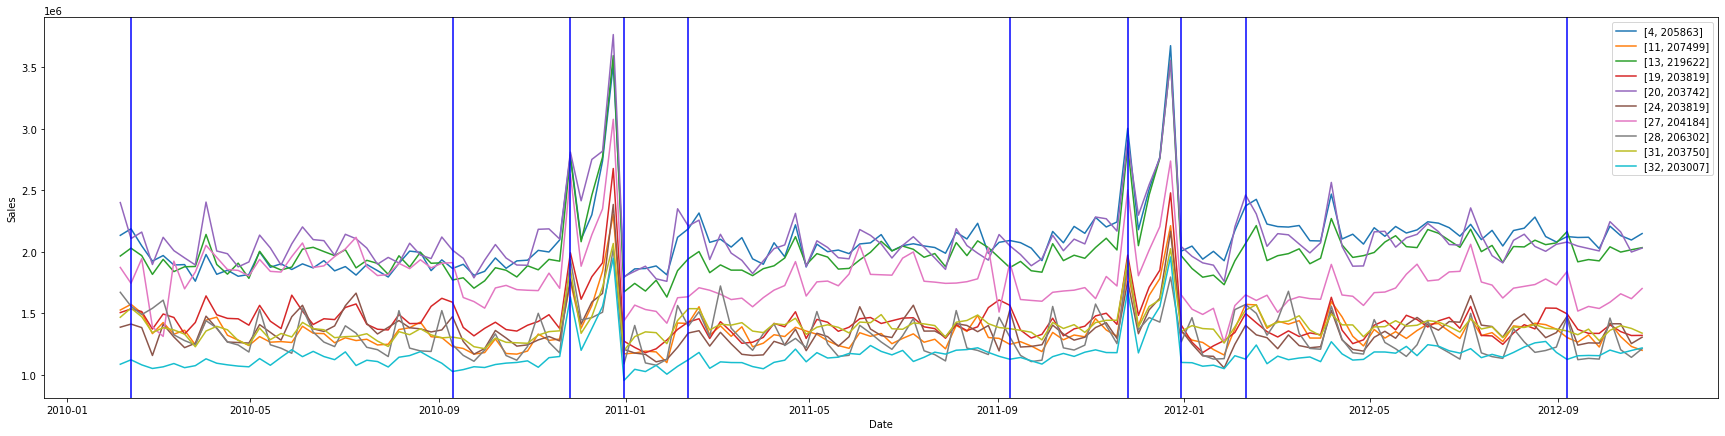

In [15]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
legend =[]
for i in range(0,45):
    if stores.Type[i] == "A" and stores.Size[i] > 203000:
        plt.ylabel('Sales')
        plt.xlabel('Date')
        plt.plot(all_stores_sales[i].index, all_stores_sales[i].values)
        legend.append([i+1, stores.Size[i]])
first_store_features_isHol = features.loc[(features['Store'] == 1)][['Date','IsHoliday']].set_index('Date') 
first_store_features_isHol = first_store_features_isHol[first_store_features_isHol.index 
                                                        <= datetime.datetime(2012, 10, 26)]
first_store_features_isHol = first_store_features_isHol[first_store_features_isHol['IsHoliday'] == True]
for i in  range(0, len(first_store_features_isHol)):
    plt.axvline(x = first_store_features_isHol.index[i], color = 'b', label = 'axvline - full height')
plt.legend(legend)    

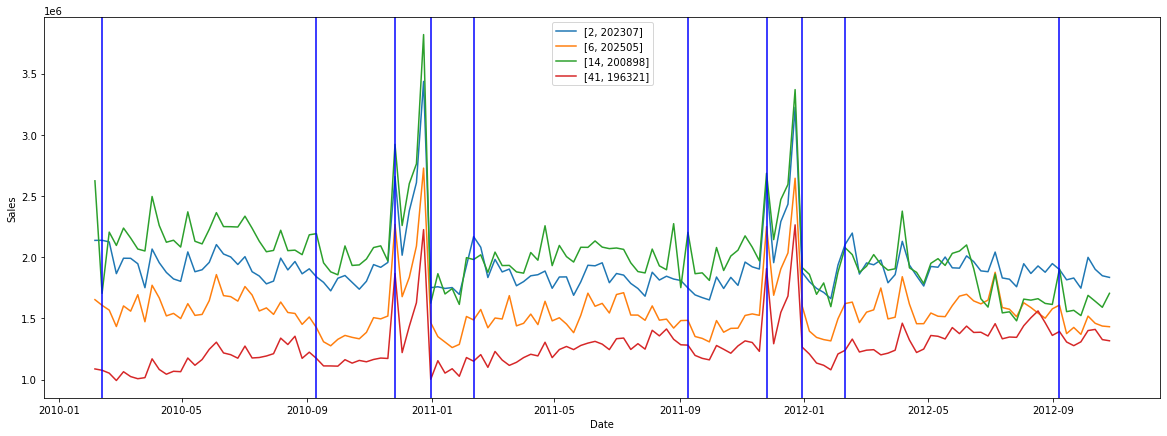

In [16]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
legend =[]
for i in range(0,45):
    if stores.Type[i] == "A" and stores.Size[i] <= 203000 and stores.Size[i] > 190000:
        plt.ylabel('Sales')
        plt.xlabel('Date')
        plt.plot(all_stores_sales[i].index, all_stores_sales[i].values)
        legend.append([i+1, stores.Size[i]])

for i in  range(0, len(first_store_features_isHol)):
    plt.axvline(x = first_store_features_isHol.index[i], color = 'b', label = 'axvline - full height')
plt.legend(legend)

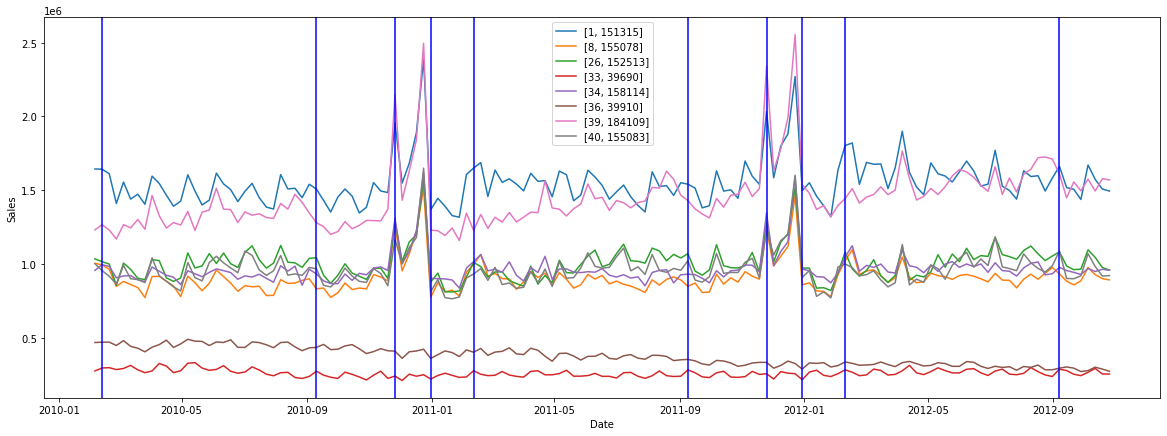

In [17]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
legend =[]
for i in range(0,45):
    if stores.Type[i] == "A" and stores.Size[i] <= 190000:
        plt.ylabel('Sales')
        plt.xlabel('Date')
        plt.plot(all_stores_sales[i].index, all_stores_sales[i].values)
        legend.append([i+1, stores.Size[i]])

for i in  range(0, len(first_store_features_isHol)):
    plt.axvline(x = first_store_features_isHol.index[i], color = 'b', label = 'axvline - full height')
plt.legend(legend)

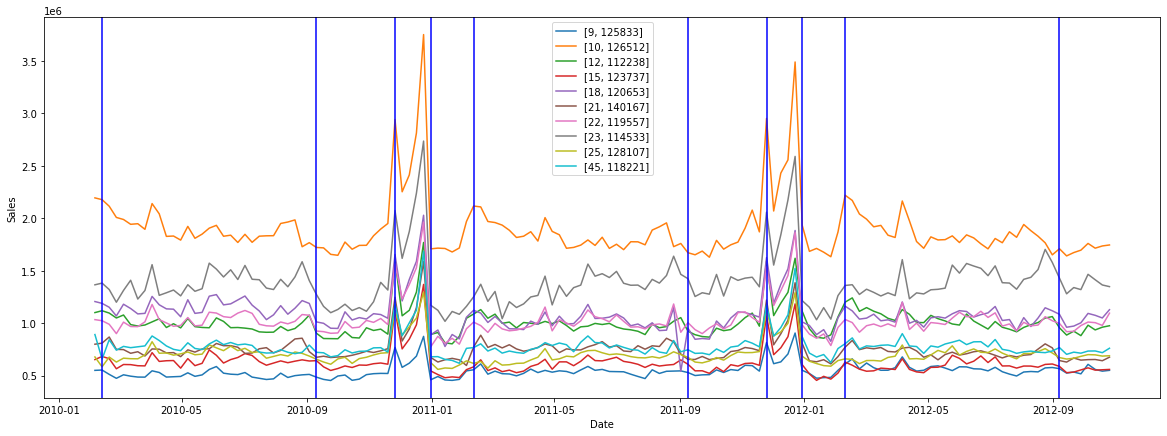

In [18]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
legend =[]
for i in range(0,45):
    if stores.Type[i] == "B" and stores.Size[i] > 110000:
        plt.ylabel('Sales')
        plt.xlabel('Date')
        plt.plot(all_stores_sales[i].index, all_stores_sales[i].values)
        legend.append([i+1, stores.Size[i]])

for i in  range(0, len(first_store_features_isHol)):
    plt.axvline(x = first_store_features_isHol.index[i], color = 'b', label = 'axvline - full height')
plt.legend(legend)  

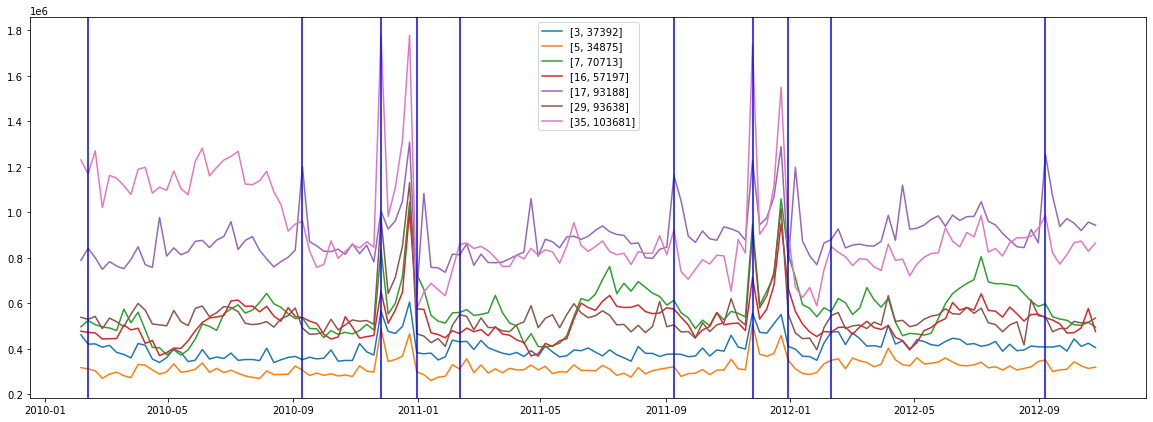

In [19]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
legend =[]
for i in range(0,45):
    if stores.Type[i] == "B" and stores.Size[i] <= 110000:
        plt.plot(all_stores_sales[i].index, all_stores_sales[i].values)
        legend.append([i+1, stores.Size[i]])

for i in  range(0, len(first_store_features_isHol)):
    plt.axvline(x = first_store_features_isHol.index[i], color = 'b', label = 'axvline - full height')
plt.legend(legend) 

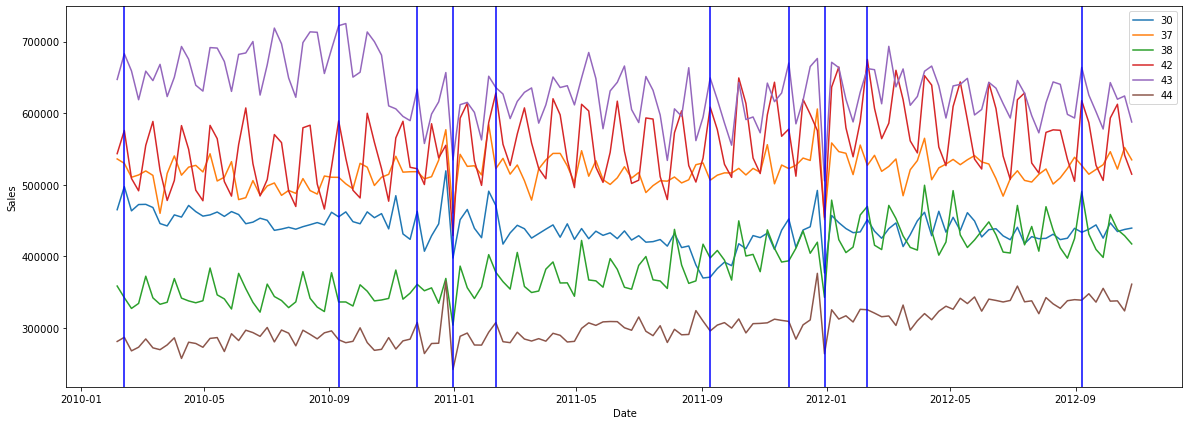

In [20]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
legend =[]
for i in range(0,45):
    if stores.Type[i] == "C":
        plt.ylabel('Sales')
        plt.xlabel('Date')
        plt.plot(all_stores_sales[i].index, all_stores_sales[i].values)
        legend.append(i+1)

for i in  range(0, len(first_store_features_isHol)):
    plt.axvline(x = first_store_features_isHol.index[i], color = 'b', label = 'axvline - full height')
plt.legend(legend) 

After reading the graphs it can be seen that the type A stores make more sales overall. However, it is hard to suggest converting all stores to type A stores due to the fact that it is unknown if the stores sell the same type products. Another idea that came through my mind is that converting a store's type would cost a lot of money in real life. Therefore, as long as other type stores do not work in an unprofitable way there is no need to invest in converting them. I have also made an assumption that the size of the store's storage is not important because it can be seen that similar size stores of the same type perform differently.

As no useful information was obtained after analyzing the graphs, the suggestions will be made according to correlations.

### Proposals

As there were seen a great correlation between sales and markdown3 feature, I would firstly suggest look for opportunities how the other markdowns could be improved to get similar correlations with them as well. 

Secondly, there should be greater analysis for unemployment conducted as the markdowns could be evoked when unemployment rise is detected.

Moreover, during colder days there could be more markdowns evoked as well. In addition, before colder seasons holidays there should be more markdowns created as the buying force increases mostly under these circumstances.

Lastly, I noticed that during holidays type C stores are mostly affected by it in an opposite way than other type stores. As a result, greater impact needs to be made in the markdowns in type C stores as they are one of key driving forces for sales to escape the drop of sales during these periods.   

## 2012-12-10 2013-07-26 sales prediction

For sales prediction a simple Long Short Term memory model was chosen as it is recommended to use with time series. Inputs for the model are the driving keys. As the keys were only provided up to  26th July 2013 the predictions are only made for this period.

In [ ]:
training_end_date = pd.Timestamp('2011-12-30')
testing_start_date = pd.Timestamp('2012-01-06')
testing_end_date = pd.Timestamp('2012-10-26')

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array

In [ ]:
!pip install keras 

Function for transforming data to simple LSTM model.

In [ ]:
def transform_data(features, sales):
    X = list()
    Y = list()
    for i in range(len(features)):
        X.append([features.Temperature[i], features.Unemployment[i], features.IsHoliday[i], features.MarkDown3[i], features.MarkDown5[i]])
    for i in range(len(sales)):
        Y.append(sales.values[i])
    return array(X), array(Y)

In [ ]:
n_steps = 5
n_features = 1

Function for evaluating the accuracy of the model.

In [ ]:
from sklearn.metrics import mean_squared_log_error
def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

Function for building stacked LSTM model.

In [ ]:
def model_LSTM(steps, features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(steps, features)))
    model.add(LSTM(30, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
model = model_LSTM(n_steps, n_features)

for i in range(1,46):
    print("Checking the model for predicting sales for store ", i)
    features_x = features.loc[features['Store'] == i][['Date','Temperature','Unemployment', 'IsHoliday',
                                                   'MarkDown3', 'MarkDown5']].set_index('Date')
    train_features = features_x[features_x.index <= training_end_date]
    test_features = features_x[(features_x.index >= testing_start_date) & (features_x.index <= testing_end_date)]
    data = all_stores_sales[i-1]
    train_sales = data[:training_end_date]
    test_sales = data[testing_start_date:]
    train_X, train_Y = transform_data(train_features, train_sales)
    test_X, test_Y = transform_data(test_features, test_sales)
    train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
    model.fit(train_X, train_Y, epochs=500, verbose=0)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
    yhat = model.predict(test_X, verbose=0)
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(7)
    ax = None
    ax = plt.plot(test_features.index, test_Y)
    ax =plt.plot(test_features.index, yhat) 
    plt.grid(alpha=0.2)
    plt.ylabel('Sales')
    plt.xlabel('Date')
    plt.legend(['True sales', 'Predicted sales'])
    plt.show()
    loss = RMSLE(test_Y, yhat)
    print("Loss:", loss)

    

In [ ]:
training_end = pd.Timestamp('2012-10-26')
prediction_start = pd.Timestamp('2012-12-10')

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)

model = model_LSTM(n_steps, n_features)

for i in range(1,46):
    print("Predicting sales for store ", i)
    features_x = features.loc[features['Store'] == i][['Date','Temperature','Unemployment', 'IsHoliday',
                                                   'MarkDown3', 'MarkDown5']].set_index('Date')
    train_features = features_x[features_x.index <= training_end]
    test_features = features_x[(features_x.index >= prediction_start)]
    data = all_stores_sales[i-1]
    train_X, train_Y = transform_data(train_features, data)
    test_X, test_Y_unused = transform_data(test_features, data)
    train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
    model.fit(train_X, train_Y, epochs=500, verbose=0)
    yhat = model.predict(test_X, verbose=0)
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(7)

    ax = None
    ax =plt.plot(test_features.index, yhat) 

    plt.grid(alpha=0.2)
    plt.ylabel('Sales')
    plt.xlabel('Date')
    plt.legend(['Predicted sales'])
    plt.show()